In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

sns.set_theme()

data = pd.read_csv("Gender Classification.csv") # Reading in the Gender Classification dataset

## Data
It is important to note that for this model, the dataset was modified to cleary separate the genders. More specifically, the gender column in the dataset was sorted alphabetically in order to easily focus on the attributes of each gender. The first 2502 rows are stricly female while the remaining rows are males. 

Lets take a look at the data.

In [2]:
data 

,long_hair,Forehead Width (cm),Forehead Height (cm),nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,Gender
0,0,14.0,5.4,0,0,1,0,Female
1,1,13.5,5.9,0,0,0,0,Female
2,0,13.0,5.2,0,0,0,0,Female
3,1,11.9,5.4,1,0,1,1,Female
4,1,12.1,5.4,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,12.1,6.2,1,1,1,1,Male
4997,1,14.1,7.0,1,1,1,1,Male
4998,1,12.9,7.0,1,1,1,1,Male
4999,1,12.3,6.9,0,1,1,1,Male


-------------------------------------------------------------------------------------------------------------------------------------------------
We will begin by instantiating a variable for the each genders forehead width and height attributes. For instance, the variable "female_w" will contain the forehead width measurement of the first 100 rows, which are all female. Similarly, "female_h" will contain all the forehead height measurments of the first 100 rows as well. The same will be done with the males, which begins at the 2503 row of the sorted dataset; however, for simplicity we will use the last 100 rows of the dataset, which are all male.  

In [3]:
female_w = data.iloc[:100]["Forehead Width (cm)"] # storing the width feature measurement of the first 100 rows (females)
female_h = data.iloc[:100]["Forehead Height (cm)"] # storing the height feature measurement of the first 100 rows (females)

male_w = data.tail(100)["Forehead Width (cm)"]    # storing the width feature measurement of the last 100 rows (males)
male_h= data.tail(100)["Forehead Height (cm)"]    # storing the height feature measurement of the last 100 rows (males)

Lets see a visualization of the data -- more specifically, lets see the genders as a function of forehead width and height. 

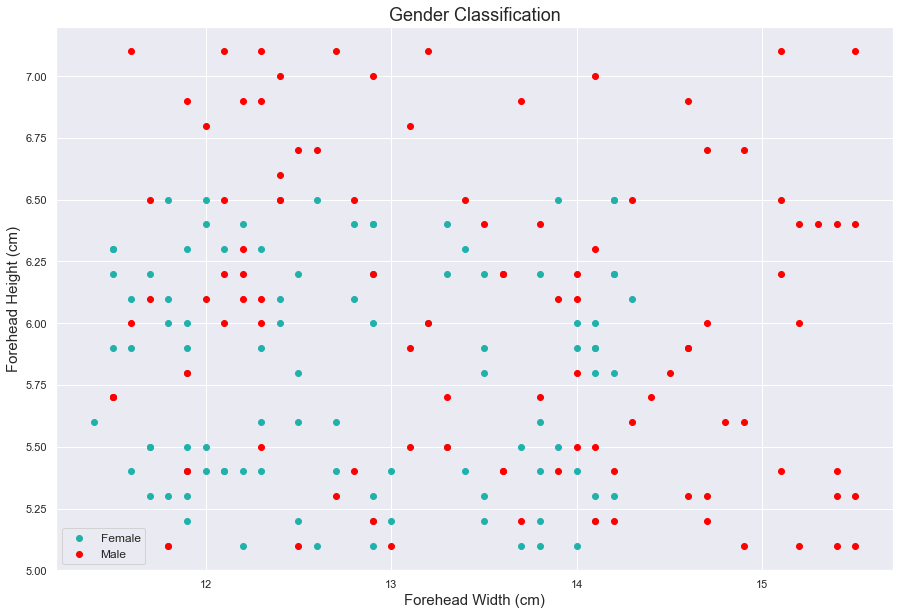

In [4]:
plt.figure(figsize = (15, 10))
plt.scatter(female_w,
            female_h,
            color = "lightseagreen",
            label = "Female")
plt.scatter(male_w,
            male_h,
            color = "red",
            label = "Male")        
plt.xlabel("Forehead Width (cm)", fontsize = 15)
plt.ylabel("Forehead Height (cm)", fontsize = 15)
plt.legend(fontsize = 12)
plt.title("Gender Classification", fontsize = 18)
plt.show()

As we can see above, this data is non-linearly separable -- that is, the males and females cannot be split by a linear funciton -- because both genders overlap in the same region. 

However, it is important to notice that the probability of selecting a female is higher than a male whenever the forehead width is less than 14 and forehead height is less than 6.5. This is because most of the female data points are within this region while the male data points are scattered both within and outside of this region. Moreover, the probability of selecting a male over a female is almost certain whenever forehead width is greater than ~14.3 and the forehead height is higher than 6.50.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Considering the probabilities mentioned above, we will focus on a single attribute instread of two. Since we have two genders, we will try to seperate the data based on the single measurement that predicts the probability of being a male or female.

Thus, now, we will label (y) each female by 0 and each male by 1. Then, we will observe the forehead width as the feature measurement (x).


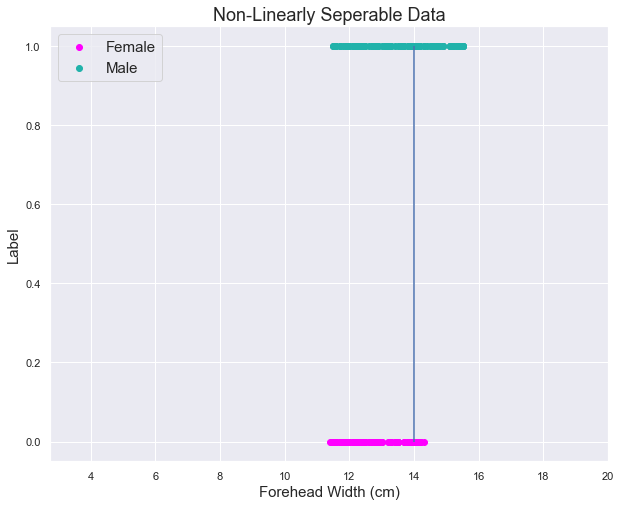

In [5]:
plt.figure(figsize = (10, 8))
plt.xlim((2.75, 20))
plt.scatter(female_w, 
            np.zeros(100), 
            color = "magenta", 
            label = "Female")
plt.scatter(male_w, 
            np.ones(100), 
            color = "lightseagreen", 
            label = "Male")
plt.vlines(14, 0.0, 1.0)
plt.xlabel("Forehead Width (cm)", fontsize = 15)
plt.ylabel("Label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

Based on the plot above, we can see that a forehead width less than 14 cm is a higher probability of being female.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Similar to before, we will label (y) each female by 0 and each male by 1. But, this time we will observe the forehead height as the feature measurement (x).


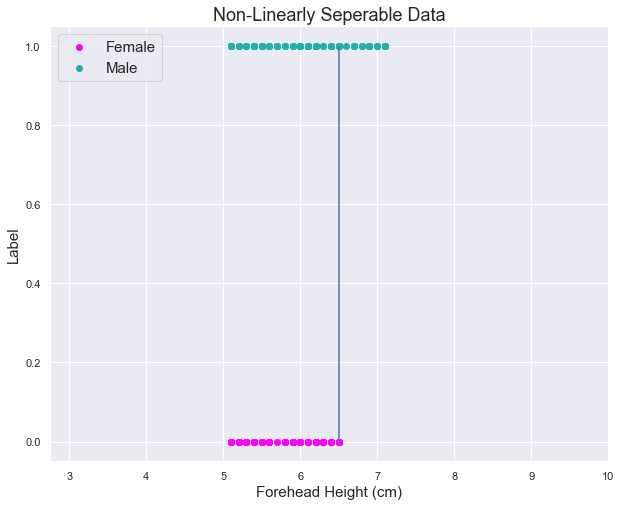

In [6]:
plt.figure(figsize = (10, 8))
plt.xlim((2.75, 10))
plt.scatter(female_h, 
            np.zeros(100), 
            color = "magenta", 
            label = "Female")
plt.scatter(male_h, 
            np.ones(100), 
            color = "lightseagreen", 
            label = "Male")
plt.vlines(6.5, 0.0, 1.0)
plt.xlabel("Forehead Height (cm)", fontsize = 15)
plt.ylabel("Label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

Again, we can see that a higher probability for slecting a female when forehead height is below 6.5 cm.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Model

Now, we will see how to model this with a Single Neuron that predicts a probability. 

As an activation function, we will use the Sigmoid activation function: 
    = 1/(1 + e^(-z))

This differentiable function has a range in (0,1), so it would seem suitable for a possible function to turn the pre-activation value into a value representing a probability.
 

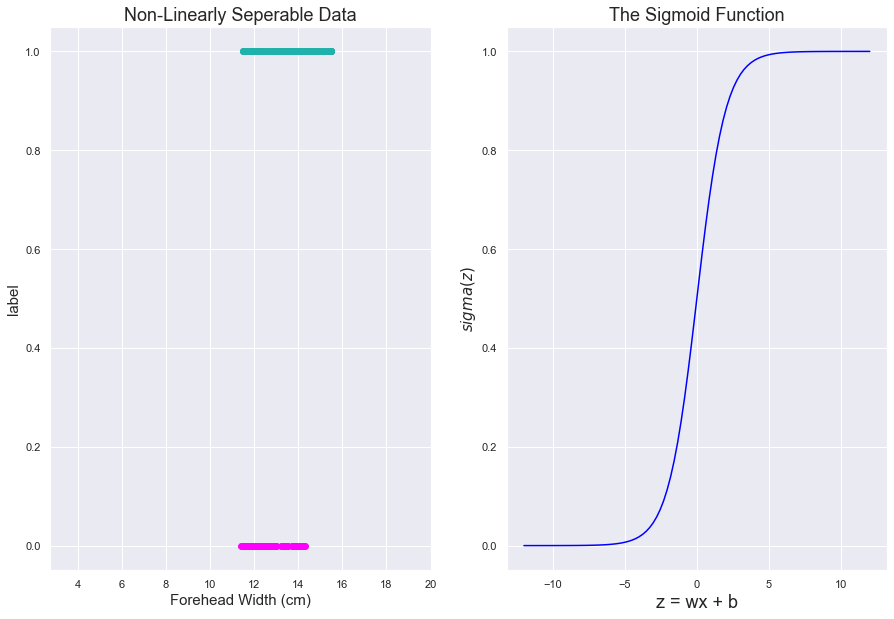

In [7]:
def sigmoid(z): 
    return 1.0/(1.0 + np.exp(-z)) # sigmoid function

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.set_xlim((2.75, 20))
ax1.scatter(female_w, 
            np.zeros(100), 
            color = "magenta", 
            label = "Female")
ax1.scatter(male_w, 
            np.ones(100), 
            color = "lightseagreen", 
            label = "Male")
ax1.set_xlabel("Forehead Width (cm)", fontsize = 15)
ax1.set_ylabel("label", fontsize = 15)
ax1.set_title("Non-Linearly Seperable Data", fontsize = 18)


domain = np.linspace(-12.0, 12.0, 100) # domain to plot prediction over
                                       # np.linspace: returns array with evenly spaced numbers based on a given interval (100)

ax2.plot(domain, 
        sigmoid(domain), 
        color = "blue", 
        label = "$\sigma$(z)")
ax2.set_xlabel("z = wx + b", fontsize = 18)
ax2.set_ylabel("$sigma(z)$", fontsize = 15)
ax2.set_title("The Sigmoid Function", fontsize = 18)
plt.show()

Based on the plot above, we can see the Sigmoid Function seperate the two class. As Z increase, the probability of selecting a male becomes higher

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Moving forward, we must recall that the choice of activation function determines what the model will do, such as classification or regression, in relation with the problem or task we are trying to answer or complete, respectively. 

In this case, since we are trying to predict a class probability, we will use a sigmoid activation function. We will implement stochastic gradient descent with the train method. Additionally, to verify our prediction is correct, we we will use the Binary Cross Entropy Loss function. 

In [52]:
class Single_Neuron(object): # class used to represent a single artificial neuron. 
    
    def __init__(self, activation_function, cost_function): # method used for intialization of data member(s) -- In this case, activation function
        
        self.activation_function = activation_function
        self.cost_function = cost_function

    """
    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 


    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    
    def train(self, X, y, alpha = 0.005, epochs = 50): # where alpha is the learning rate
   
        self.weights = np.random.rand(1 + X.shape[1])  # weights initialized to be random
        self.errors_ = []                              # list of the misclassifications 
        N = X.shape[0]

        for _ in range(epochs):

            errors = 0 # counter for the errors during each epoch
            
            for x_i, target in zip(X, y):                                   # pairing the X (feature vector) with cooresponding y (label)
                self.weights[:-1] -= alpha*(self.predict(x_i) - target)*x_i # this is the weights term: w = w - alpha*(y_hat - y)*x_i
                self.weights[-1] -= alpha*(self.predict(x_i) - target)      # this is the bias term: b = b - alpha*(y_hat - y)
                errors += self.cost_function(self.predict(x_i), target)     # Binary Cross Entropy Loss Function
            self.errors_.append(errors/N)
        return self

    def predict(self, X):                                               # predict method
        preactivation = np.dot(X, self.weights[:-1]) + self.weights[-1] # dot product with feature measurement, weight, and bias, respectively.
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Before instantiating an instance of our Single Neuron class, we must create a binary cross entropy loss function. Only then can we instantiate an instance of our Single Neuron class. 

Aftwerwards we need to convert the female and male forehead width measurements to a numpy.ndarray and reshape it into a column vector representation (recall that this is necessary whenever our feature measurements consist of a single measurement). Then, we need to create a target (y) numpy.ndarray which assigns the labels 0 and 1 to the female and male genders, respectively.

In [87]:
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

node = Single_Neuron(sigmoid, cross_entropy_loss)

X = data["Forehead Width (cm)"].iloc[2403:2603].values # Storing the desired feature measurements in the matrix X
X = X.reshape(-1, 1)
y = np.where(data.iloc[2403:2603].Gender == "Female", 0, 1)  # wherever y = "Female", it will become 0, and 1 otherwise 

node.train(X, y, alpha = 0.001, epochs = 5000)

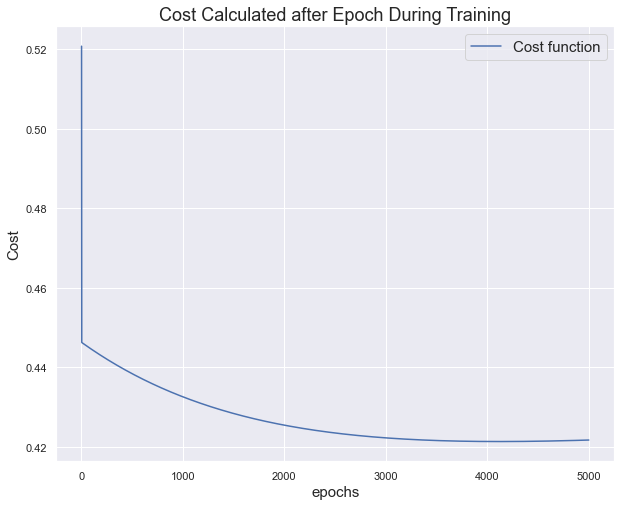

In [88]:
node.plot_cost_function()
plt.show()

The neuron appears to be learning!

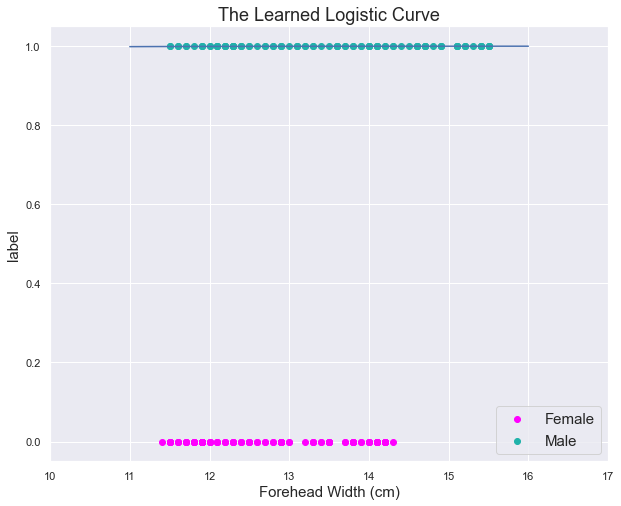

In [102]:
plt.figure(figsize = (10, 8))
plt.xlim((10, 17))
plt.scatter(female_w, 
            np.zeros(100), 
            color = "magenta", 
            label = "Female")
plt.scatter(male_w, 
            np.ones(100), 
            color = "lightseagreen", 
            label = "Male")

domain = np.linspace(11, 16, 100)

plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Forehead Width (cm)", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "lower right")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

Not sure what exactly happened here

In [67]:
node.predict(X)

array([0.99988147, 0.99982584, 0.99974411, ..., 0.99972364, 0.99956149,
       0.99995965])

In [68]:
np.rint(node.predict(X)) != y

array([ True,  True,  True, ..., False, False, False])

In [69]:
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.5000999800039992


c:\Users\gonza\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


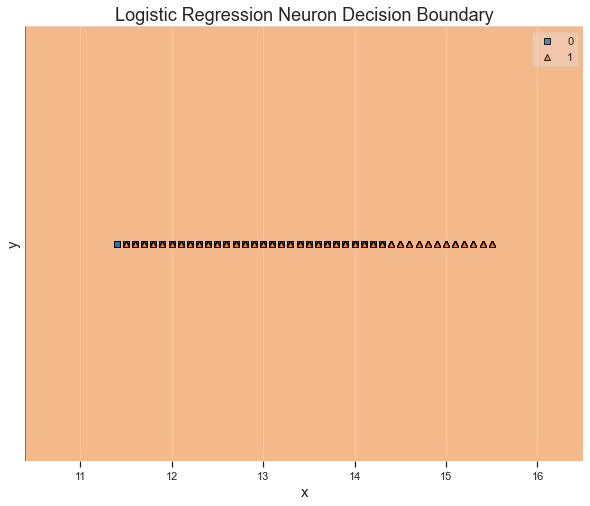

In [103]:
node.plot_decision_boundary(X, y)
plt.show()